In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
file='/home/ubuntu/Desktop/Coding/ML/insurance.csv'
df=pd.read_csv(file)

In [6]:
df.head()

,age,sex,bmi,children,smoker,any body issues,region,charges
0,19,female,27.900,0,yes,yes,southwest,16884.92400
1,18,male,33.770,1,no,no,southeast,1725.55230
2,28,male,33.000,3,no,no,southeast,4449.46200
3,33,male,22.705,0,no,no,northwest,21984.47061
4,32,male,28.880,0,no,no,northwest,3866.85520


In [7]:
df.shape

(1338, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   any body issues  1338 non-null   object 
 6   region           1338 non-null   object 
 7   charges          1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [9]:
#df.isnull().sum()

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'any body issues', 'region',
       'charges'],
      dtype='object')

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


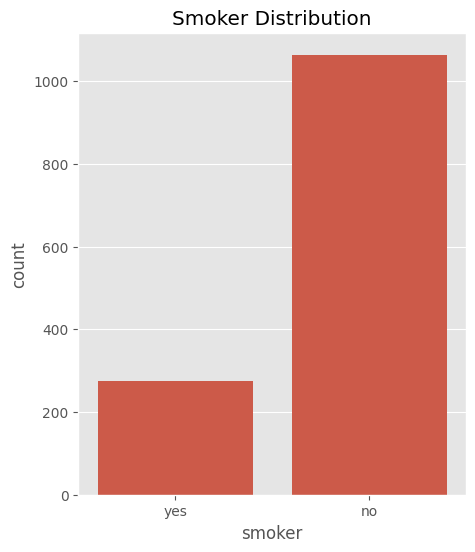

In [12]:
plt.figure(figsize=(5,6))
style.use('ggplot')
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribution')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

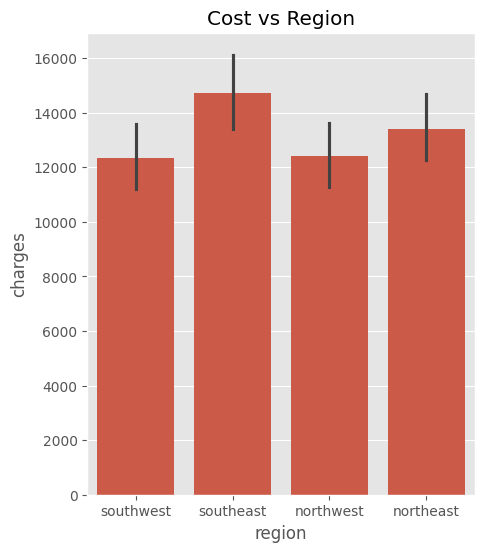

In [13]:
plt.figure(figsize=(5,6))
sns.barplot(x='region',y='charges',data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

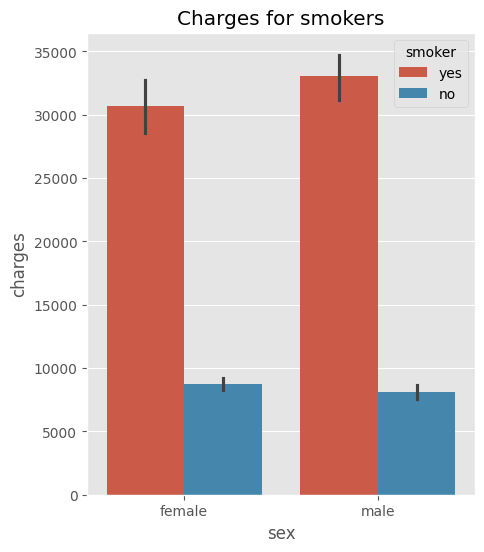

In [14]:
plt.figure(figsize=(5,6))
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.title('Charges for smokers')

In [15]:
df['sex']=df['sex'].apply({'male':0,'female':1}.get)
df['smoker']=df['smoker'].apply({'yes':1,'no':0}.get)
df['any body issues']=df['any body issues'].apply({'yes':1,'no':0}.get)
df['region']=df['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [16]:
df.head()

,age,sex,bmi,children,smoker,any body issues,region,charges
0,19,1,27.900,0,1,1,1,16884.92400
1,18,0,33.770,1,0,0,2,1725.55230
2,28,0,33.000,3,0,0,2,4449.46200
3,33,0,22.705,0,0,0,3,21984.47061
4,32,0,28.880,0,0,0,3,3866.85520


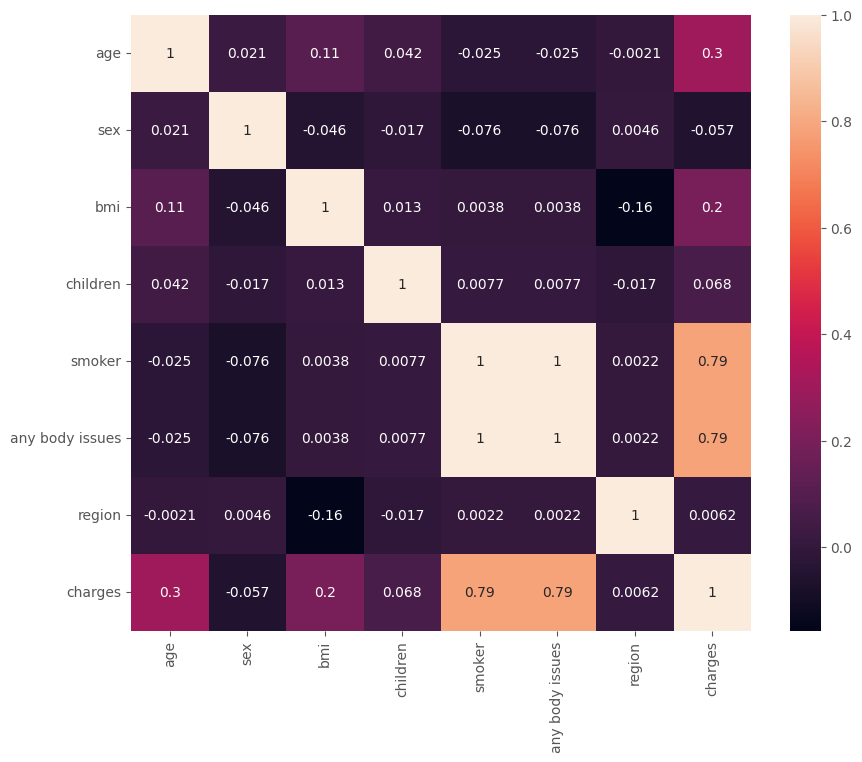

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

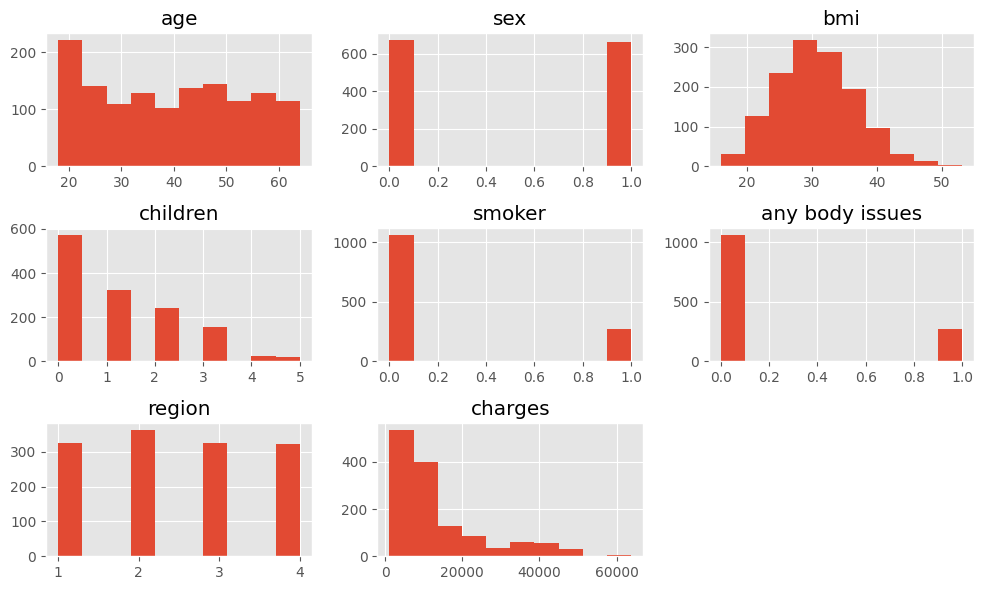

In [18]:
df.hist(figsize=(10,6),bins=10)
plt.tight_layout()
plt.show()

In [19]:
x=df.drop(['charges'],axis=1) #axis=1 as we do operation to the column
y=df.charges

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)
print("x train shape: ",xtrain.shape)
print("x test shape: ",xtest.shape)
print("y train shape: ",ytrain.shape)
print("y test shape: ",ytest.shape)

x train shape:  (936, 7)
x test shape:  (402, 7)
y train shape:  (936,)
y test shape:  (402,)


In [21]:
linre=LinearRegression()

In [22]:
linre.fit(xtrain,ytrain)
pre=linre.predict(xtest)

In [23]:
from sklearn.metrics import r2_score

In [24]:
print('r2 score: ',(r2_score(ytest,pre))) #if R2_score is less then prediction is less

r2 score:  0.7694415927057693


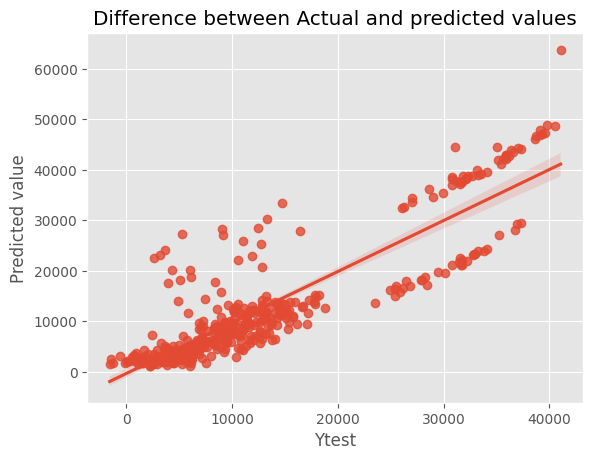

In [25]:
sns.regplot(x=pre,y=ytest)
plt.xlabel('Ytest')
plt.ylabel('Predicted value')
plt.title('Difference between Actual and predicted values')
plt.show()

In [26]:
data={'age':19,'sex':0,'bmi':22.36,'children':1,'smoker':0,'any body issues':0,'region':4}
index =[0]
custom=pd.DataFrame(data,index)
custom

,age,sex,bmi,children,smoker,any body issues,region
0,19,0,22.36,1,0,0,4


In [27]:
custpred=linre.predict(custom)
print("The medical insurance cost of new customer is: ",custpred)

The medical insurance cost of new customer is:  [844.53656011]
